#Regresión

## Regresión Lineal

Los modelos de clasificación por regresión mapea las entradas a un valor continuo, por ejemplo un entero. La finalidad de un modelo de regresión es predecir un valor numérico.


### Características


Son parte de los datasets, los cuales han sido identificados importantes para determinar un resultado preciso. 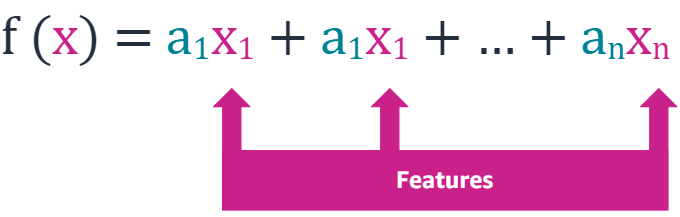



### Pesos


El peso representa que tan importante es la característica asociada para determinar la precisión del resultado. Algo que parece que puede tener la mayor precisión, tiene mayor peso y viceversa.
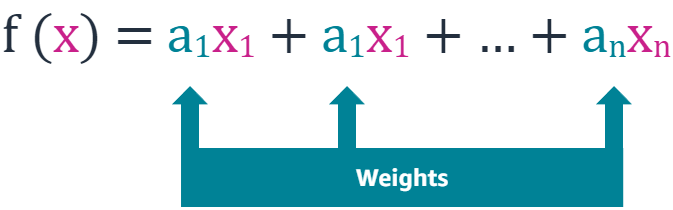

#### Ejemplo en la vida Real


##### Los investigadores médicos suelen utilizar la regresión lineal para comprender la relación entre la dosis de un fármaco y la tensión arterial de los pacientes. Por ejemplo, los investigadores pueden administrar varias dosis de un determinado fármaco a los pacientes y observar cómo responde su tensión arterial.


#### Podrían ajustar un modelo de regresión lineal simple utilizando la dosis como variable predictora y la tensión arterial como variable de respuesta. El modelo de regresión tendría la siguiente forma
$$ presion arterial = β_0 + β_1(dosis) $$


*   El coeficiente β0 representaría la presión arterial esperada cuando la dosis es cero.
*   El coeficiente β1 representaría el cambio medio en la presión arterial cuando la dosis se incrementa en una unidad.

*   Si β1 es negativo, significaría que un aumento de la dosis se asocia a una disminución de la presión arterial.

*   Si β1 es cercano a cero, significaría que un aumento de la dosis no se asocia a ningún cambio en la presión arterial.

*   Si β1 es positivo, significaría que un aumento de la dosis se asocia a un aumento de la presión arterial.


En función del valor de β1, los investigadores pueden decidir cambiar la dosis administrada a un paciente.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [ ]:
# Generamos nuestros datos
np.random.seed(0)
dosis = np.random.rand(50) * 10
presion_sangre = 120 - 5 * dosis + np.random.randn(50) * 2


In [ ]:
# Crea un DataFrame para trabajar con los datos:
data = pd.DataFrame({'Dosis': dosis, 'PresionSangre': presion_sangre})

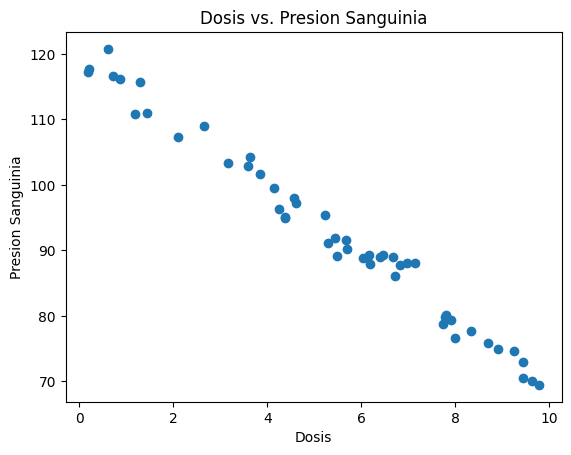

In [ ]:
# Visualizamos la informacion
plt.scatter(data['Dosis'], data['PresionSangre'])
plt.xlabel('Dosis')
plt.ylabel('Presion Sanguinia')
plt.title('Dosis vs. Presion Sanguinia')
plt.show()


Interpreta los coeficientes:


*   β0 representa la presión arterial esperada cuando la dosis es cero.
*   β1 representa el cambio promedio en la presión arterial cuando la dosis se incrementa en una unidad.
*   Si β1 es negativo, indica una disminución en la presión arterial por cada unidad de aumento en la dosis.
*   Si β1 es positivo, indica un aumento en la presión arterial por cada unidad de aumento en la dosis.



In [ ]:
# Ajusta el modelo de regresión lineal:
X = data[['Dosis']] # Variable predictora
y = data['PresionSangre']  # Variable de respuesta

# Crea y ajusta el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
beta0 = model.intercept_
beta1 = model.coef_[0]

print(f'Intercept (β0): {beta0}')
print(f'Slope (β1): {beta1}')



Intercept (β0): 119.98557983173946
Slope (β1): -5.061453410538097


In [ ]:
# Realizar predicciones para la visualización
x_values = np.linspace(0, 10, 100)  #  Generar 100 puntos para el eje x
y_values = beta0 + beta1 * x_values

# Predecir la presión sanguínea para nuevas dosis
new_dosage = np.array([2, 4, 6])
predicted_blood_pressure = model.predict(new_dosage.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


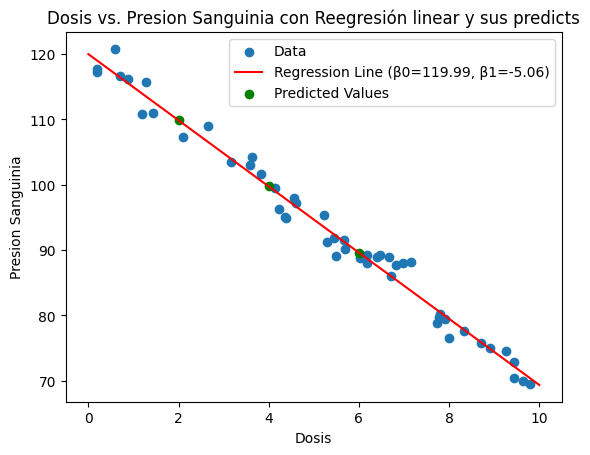

In [ ]:
# Plot the data points, regression line, and predicted values
plt.scatter(data['Dosis'], data['PresionSangre'], label='Data')
plt.plot(x_values, y_values, color='red', label=f'Regression Line (β0={beta0:.2f}, β1={beta1:.2f})')
plt.scatter(new_dosage, predicted_blood_pressure, color='green', marker='o', label='Predicted Values')
plt.xlabel('Dosis')
plt.ylabel('Presion Sanguinia')
plt.title('Dosis vs. Presion Sanguinia con Reegresión linear y sus predicts')
plt.legend()
plt.show()


In [ ]:
print('Predición de Presion Sanguinia:')
for d, bp in zip(new_dosage, predicted_blood_pressure):
    print(f'Dosis: {d} - Predición de Presion Sanguinia: {bp}')

Predición de Presion Sanguinia:
Dosis: 2 - Predición de Presion Sanguinia: 109.86267301066326
Dosis: 4 - Predición de Presion Sanguinia: 99.73976618958707
Dosis: 6 - Predición de Presion Sanguinia: 89.61685936851087


##Regresión Logistica.

Utilizando la regresión logistica, nos aseguramos que solo valores entre 0 y 1 sean tomados en cuenta. \\
<figure>
<center>
<img src='https://datatab.net/assets/tutorial/Logistic-function.png' />
<figcaption>Representación gráfica de la curva S que describe la función sigmoide. Recuperado <a href="https://datatab.net/tutorial/logistic-regression" title="example">DATAtab: Logistic Regression</a></figcaption></center>
</figure>
Como se puede observar en la imagen anterior, gracias a que la función sigmoide puede mapear valores $[-\infty,\infty]$ a valores $[0,1]$, se pueden predecir variables dicotómicas, es decir, variables con valores entre 0 y 1 (si un dato pertenece a una u otra clase).

A continuación, retomando el ejemplo de spam, con la regresión logística, podemos determinar ¿Que tan probable es que un correo sea spam si contiene la palabra $X$ y la palabra $Y$?  

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import nltk
import re
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
nltk.download('punkt')
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Se carga la información del archivo .csv con la función read_csv de pandas
emails = pd.read_csv('emails.csv')

In [ ]:
# Para visualizar las primeras 10 filas del archivo se utiliza la función head
emails.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Con la función info() se puede visualizar información relevante del dataset
emails.info()
# Para 'limpiar' el dataset, es necesario eliminar la primer columna ya que solo es un indicativo
emails = emails.iloc[:, 1:] # iloc aquí es usado para extraer las columnas usando sus índices

# En este caso, con iloc obtenemos las siguientes 3000 columnas (sin contar la última)
x_axis = emails.iloc[:, :3000].values
x_axis
# Por último, utilizando un índice negativo, obtenemos la ultima columna
y_axis = emails.iloc[:, -1].values
y_axis
# Utilizando la función train_test_split obtenemos los conjuntos con los que se entrenará el modelo
# --> x_train y y_train representan los elementos que se usarán para el entrenamiento
# --> x_text y y_test representan los elementos que se usarán para probar la precisión del modelo entrenado
# NOTA: El valor 0.3 representa la proporción del dataset que se usará para hacer las pruebas
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size = 0.3, random_state = 1)# Utilizando la clase de Naive Bayes incluida en sklearn se realiza el entrenamiento con los conjuntos que ya tenemos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
# Crea el modelo de regresión logística
model = LogisticRegression()

In [ ]:
# Entrena el modelo en el conjunto de entrenamiento
model.fit(x_train, y_train)
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(confusion)

# Imprime el informe de clasificación que incluye precision, recall y F1-score
print('Informe de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.96
Matriz de confusión:
[[1069   29]
 [  27  427]]
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1098
           1       0.94      0.94      0.94       454

    accuracy                           0.96      1552
   macro avg       0.96      0.96      0.96      1552
weighted avg       0.96      0.96      0.96      1552



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


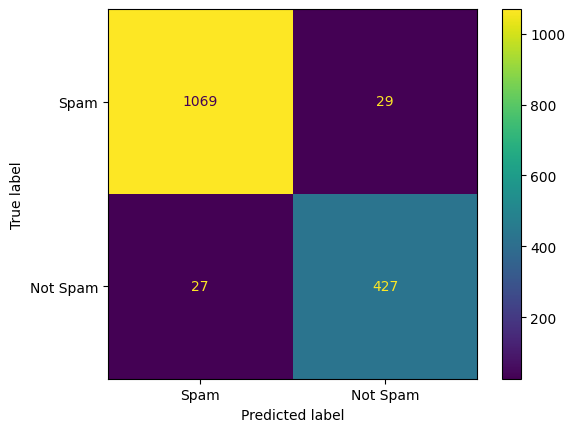

In [ ]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
cm_display.plot()
plt.show()

#Entrenamiento por crossvalidation


Crossvalidation es una técnica para evaluar el desempeño del modelo. Ayuda a comparar y seleccionar el modelo apropiado para un problema en específico.  
Independientemente de la técnica que se utilice para llevar a cabo crossvalidation, el algoritmo que siguen siempre es similar:
1. Dividir el dataset en N partes, de las cuales una se va usar para entrenamiento
2. Entrenar el método con la porción del dataset restante
3. Validar el modelo con la porción de dataset elegida
4. Repetir el paso 1 y 3, dependiendo del método de CV elegido.
<figure>
<center>
<img src='https://editor.analyticsvidhya.com/uploads/34268K-fold%20Iteration.png' />
<figcaption>Representación gráfica del proceso usando K-Fold. Recuperado <a href="https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#h-what-is-k-fold-cross-validation" title="example">K-Fold Cross Validation Technique and its Essentials</a></figcaption></center>
</figure>

A continuación se muestra un ejemplo, el cual es abordado utilizando regresión lineal y posteriormente se utiliza el método de cross validation usando K-Fold para determinar el desempeño del mismo con diferentes porciones de los datos.

In [ ]:
data = pd.read_csv('/content/clean_dataset.csv')
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
data.head(10)

,Unnamed: 0,pelvic_incidence,sacral_slope,class
0,0,63.027817,40.475232,Abnormal
1,1,39.056951,28.995960,Abnormal
2,2,68.832021,46.613539,Abnormal
3,3,69.297008,44.644130,Abnormal
4,4,49.712859,40.060784,Abnormal
5,5,40.250200,26.328293,Abnormal
6,6,53.432928,37.568592,Abnormal
7,7,45.366754,34.611142,Abnormal
8,8,43.790190,30.256437,Abnormal
9,9,36.686353,31.675469,Abnormal


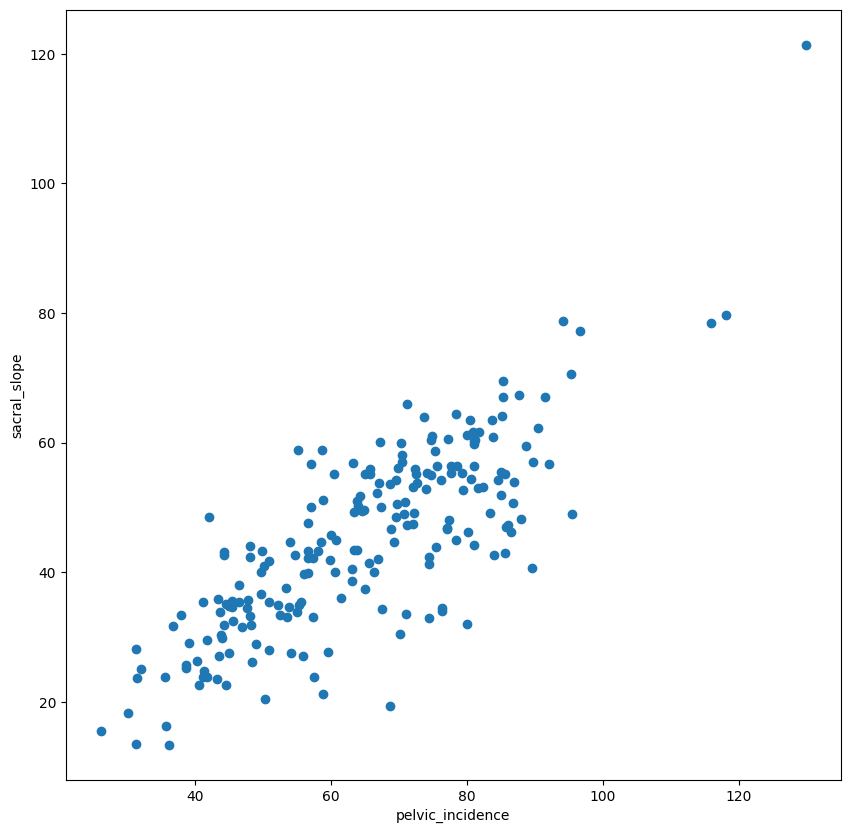

In [ ]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


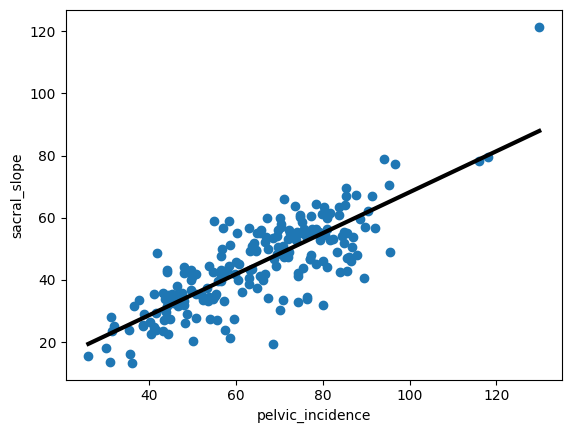

In [ ]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
reg.fit(x,y)
predicted = reg.predict(predict_space)
print('R^2 score: ',reg.score(x, y))
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [ ]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.3931462502884869


# Computo Neuronal / Perceptron


## El algoritmo del perceptron
El perceptrón es un modelo de aprendizaje lineal simple y se utiliza como base para construir redes neuronales más complejas.


La neurona es la unidad funcional de los modelos de redes. Dentro de cada neurona, ocurren simplemente dos operaciones: la suma ponderada de sus entradas y la aplicación de una función de activación.


En la primera parte, se multiplica cada valor de entrada $x_i$ por su peso asociado $w_i$ y se suman junto con el sesgo del modelo. Este es el valor neto de entrada a la neurona. A continuación, este valor se pasa por una función, conocida como función de activación, que transforma el valor neto de entrada en un valor de salida.

Si bien el valor que llega a la neurona, multiplicación de los pesos por las entradas, siempre es una combinación lineal, gracias a la función de activación, se pueden generar salidas muy diversas. Es en la función de activación donde reside el potencial de los modelos de redes para aprender relaciones no lineales.



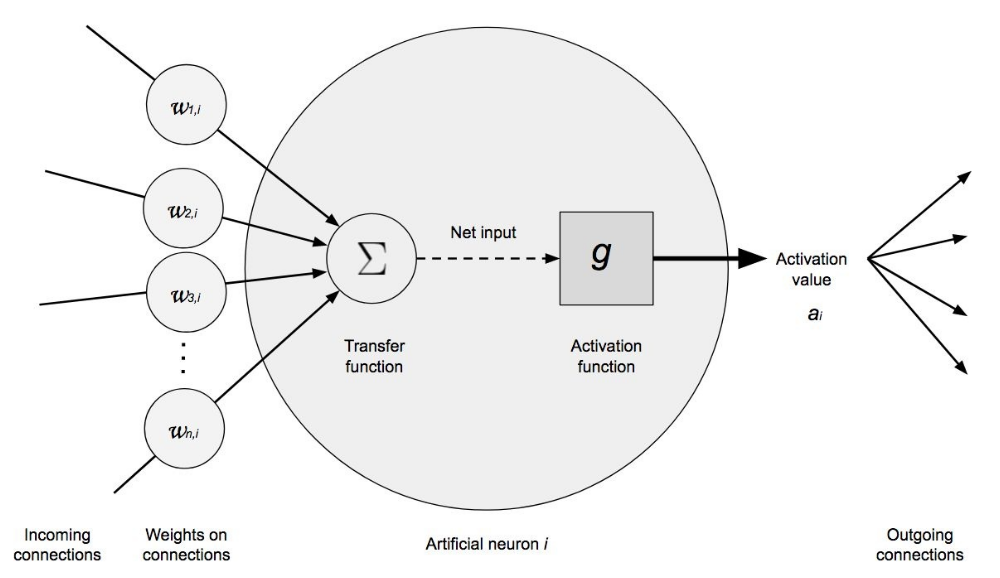


### Compuerta AND y el Perceptron


In [ ]:
import numpy as np

# Función de activación (umbral) Relu
def step_function(x):
    return 1 if x > 0 else 0

# Algoritmo del Perceptrón
def perceptron_predict(weights, input_data):
    weighted_sum = np.dot(weights, input_data)
    output = step_function(weighted_sum)
    return output

# Entrenamiento del Perceptrón para la compuerta lógica AND
def train_and_gate():
    data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels = np.array([0, 0, 0, 1])

    num_features = data.shape[1]
    weights = np.zeros(num_features + 1)  # Agregar un peso para el sesgo

    learning_rate = 0.1
    num_epochs = 100

    for epoch in range(num_epochs):
        for i in range(len(data)):
            input_data = np.insert(data[i], 0, 1)
            prediction = perceptron_predict(weights, input_data)
            error = labels[i] - prediction
            weights += learning_rate * error * input_data

    return weights

# Ejemplo de uso para la compuerta lógica AND
trained_weights = train_and_gate()

# Verificar la predicción para todos los casos de la compuerta AND
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

print("Resultado de la compuerta AND:")
for i in range(len(test_data)):
    input_data = np.insert(test_data[i], 0, 1)
    prediction = perceptron_predict(trained_weights, input_data)
    print(f"{test_data[i]} --> {prediction}")


Resultado de la compuerta AND:
[0 0] --> 0
[0 1] --> 0
[1 0] --> 0
[1 1] --> 1


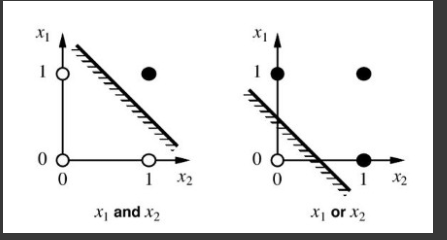

Nota: El negro representa 1 y el blanco representa 0.

Si queremos separarlos en dos, podemos hacerlo fácilmente dibujando la línea recta. En este caso, si podemos separar los datos dados dibujando la línea, podemos llamar "lo linealmente separable".

## Iris


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
print('Caracteristicas :',iris.feature_names)
print('Objetivos :',iris.target_names)

Caracteristicas : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Objetivos : ['setosa' 'versicolor' 'virginica']


El conjunto de datos iris tiene tres objetivos, usaremos sólo dos para convertirlo en un problema de clasificación binaria

In [ ]:
print(iris.data)

In [ ]:
#Agarramos solo dos caracteristicas ['sepal length (cm)', 'sepal width (cm)']
data =  iris.data[:,:2]
#print(type(data))
ones = np.ones((len(data),1))
data = np.append(data, ones, axis = 1)
#print(data)

In [ ]:
#Convirtiendo en un problema de clasificación binaria
bi_target = np.zeros((len(data),))
for i , x in enumerate(iris.target):
  if x == 0 :
    bi_target[i] = -1
  else :
    bi_target[i] = 1
print(bi_target)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


[]

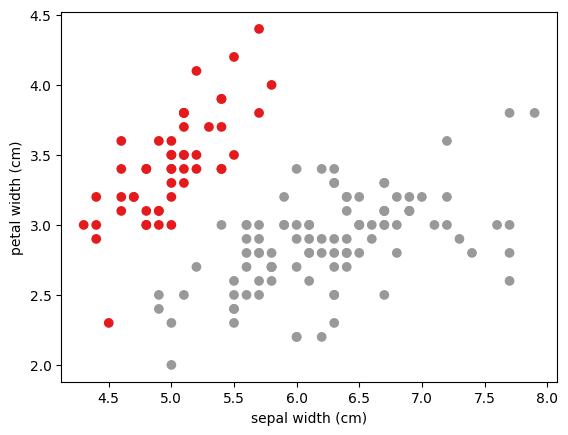

In [ ]:
plt.scatter(data[:,0],data[:,1],c= bi_target,cmap=plt.cm.Set1)
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

plt.plot()

In [ ]:
# Fitting para el Conjunto 1
w_s1 = [0,0,0] # Inicializar los pesos a cero
while(True):
  m_s1 = 0
  for i in range(len(data)):
    if (np.dot(data[i], w_s1)* bi_target[i]) <= 0.0:
      w_s1 = w_s1 + (bi_target[i] * data[i])
      #print(w_s1)
      m_s1 = m_s1 + 1
  #print(m_s1)
  if m_s1 == 0:
    break
print(w_s1)

[  79.8 -101.4 -126. ]


In [ ]:
# generan puntos a lo largo de la línea de decisión aprendida por el perceptrón
# para visualizar cómo se realiza la clasificación en el espacio de características
a_s1 = -w_s1[0] / w_s1[1]
xx_s1 = np.linspace(4,7.7)
yy_s1 = a_s1 * xx_s1 - w_s1[2] / w_s1[1]

<ipython-input-39-8ac35567fabe>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx_s1, yy_s1, 'k--', c='green')


[]

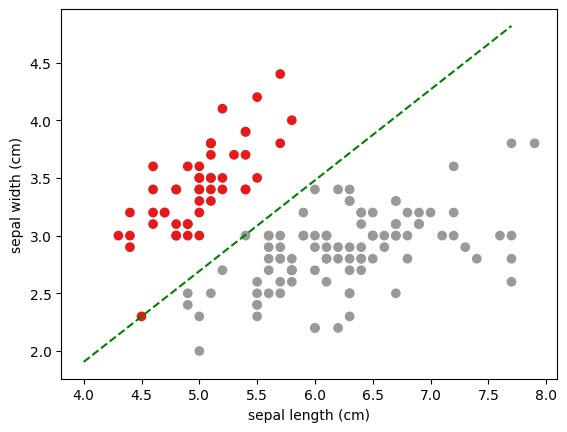

In [ ]:
#Visualizando el clasificador lineal para el Conjunto 1.
plt.scatter(data[:,0],data[:,1],c= bi_target,cmap=plt.cm.Set1)
plt.plot(xx_s1, yy_s1, 'k--', c='green')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.plot()